# Setup

In [6]:
%matplotlib inline

import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import splitter
import os
from scikits.talkbox.features import mfcc
# http://stackoverflow.com/questions/25988749/mfcc-feature-descriptors-for-audio-classification-using-librosa

ImportError: No module named 'scikits'

# Import an audio file

In [3]:
audioFile = "./jewlery.wav"
rate, data = wavfile.read(audioFile)

Display the audio waveform, this is both a sanity check and will let us see where our RMS values are low.

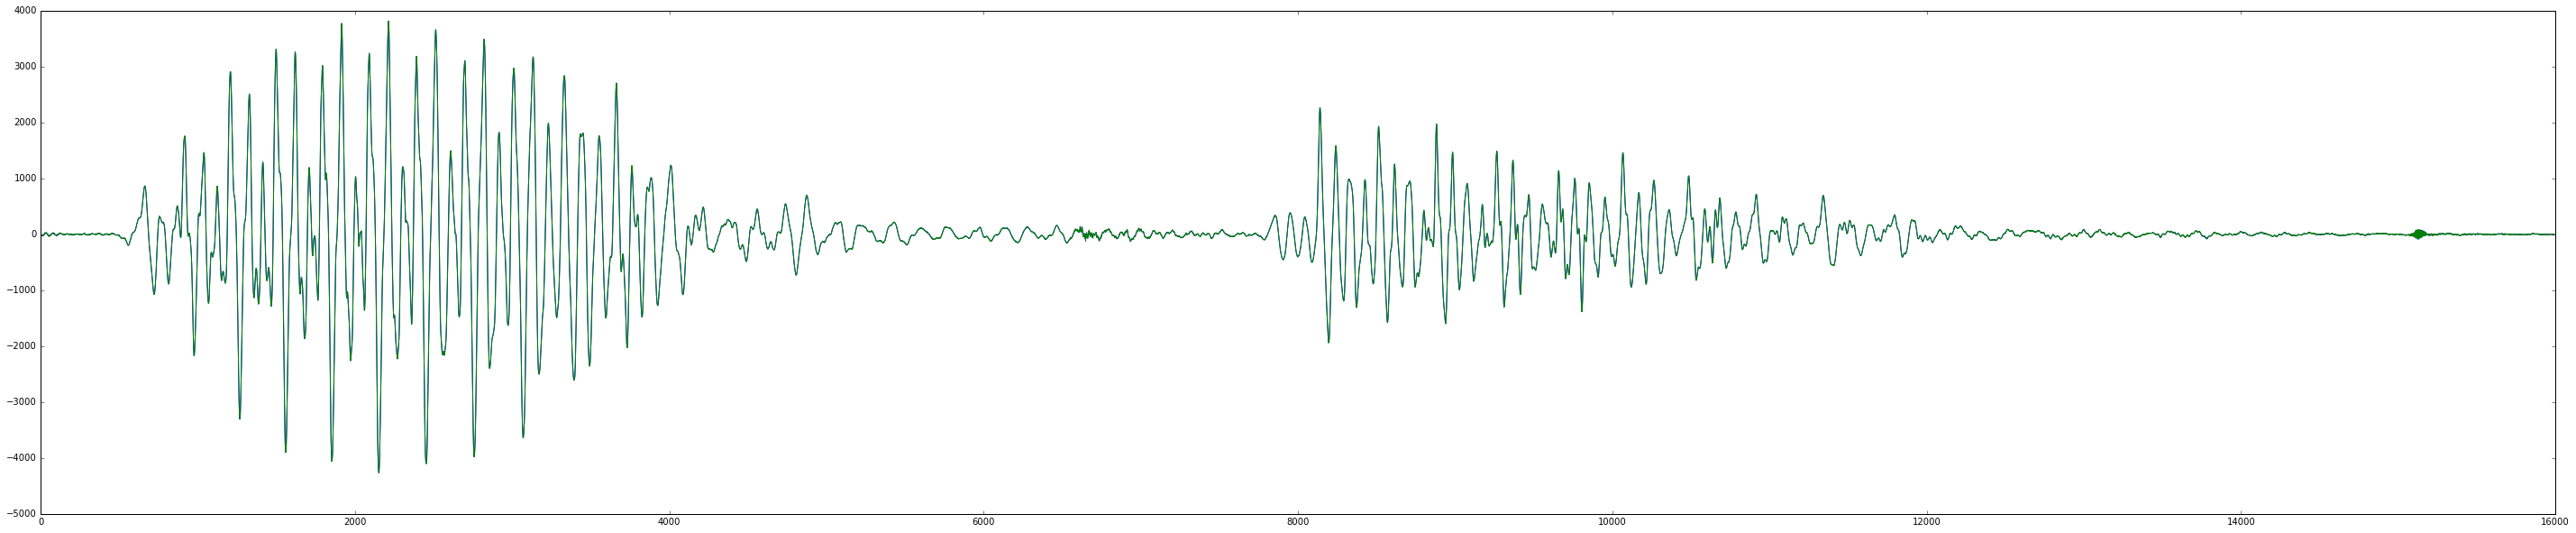

In [5]:
plt.figure(figsize=(50,10))

waveform = plt.plot(np.arange(data.shape[0]), data)

Hello darkness, my old friend
I've come to talk with you again
Because a vision softly creeping
Left its seeds while I was sleeping
And the vision that was planted in my brain
Still remains
# Within the sound of silence


In [55]:
rms = np.zeros(data.shape[0])
trigger = np.zeros(data.shape[0])
hardSplits = np.zeros(data.shape[0])

timeSilent = 0

start = -1

threshold = .75
timeThres = 30
l = 15 # window size


splitPoints = []

for i in np.arange(0,data.shape[0],l):
    end = data.shape[0]-1 if (i+5 > data.shape[0]) else i+5
    rms[i:i+5] = np.sqrt(np.mean(np.square(data[i:end])))
    if(rms[i]>threshold):
        timeSilent += 1
        if(timeSilent > timeThres):
            trigger[i:i+5] = 3500
        if(start<0):
            start = i
    else:
        if(timeSilent > timeThres):
            splitPoints.append(int((start + i)/2))
            hardSplits[int((start + i)/2)] = 10000
        start = -1
        timeSilent = 0
        trigger[i:i+5] = 0
rms2 = rms/max(rms)

/home/gaberuttner/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in sqrt


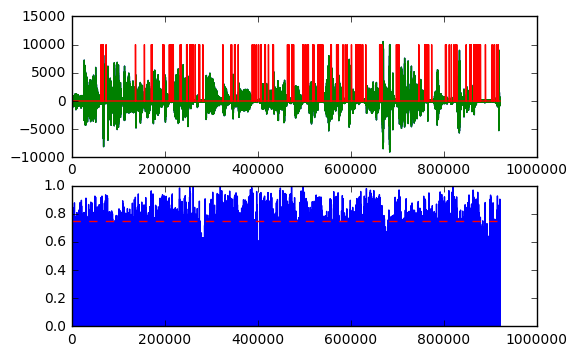

In [56]:
plt.subplot(2, 1, 1)
plt.plot(np.arange(data.shape[0]), data)
# plt.plot(np.arange(data.shape[0]), trigger)
plt.plot(np.arange(data.shape[0]), hardSplits)


plt.subplot(2, 1,2)
plt.plot(np.arange(data.shape[0]), rms2)
plt.ylim([0,1])

plt.plot([0, data.shape[0]], [threshold,threshold], '--', color='red')  # Middle bar


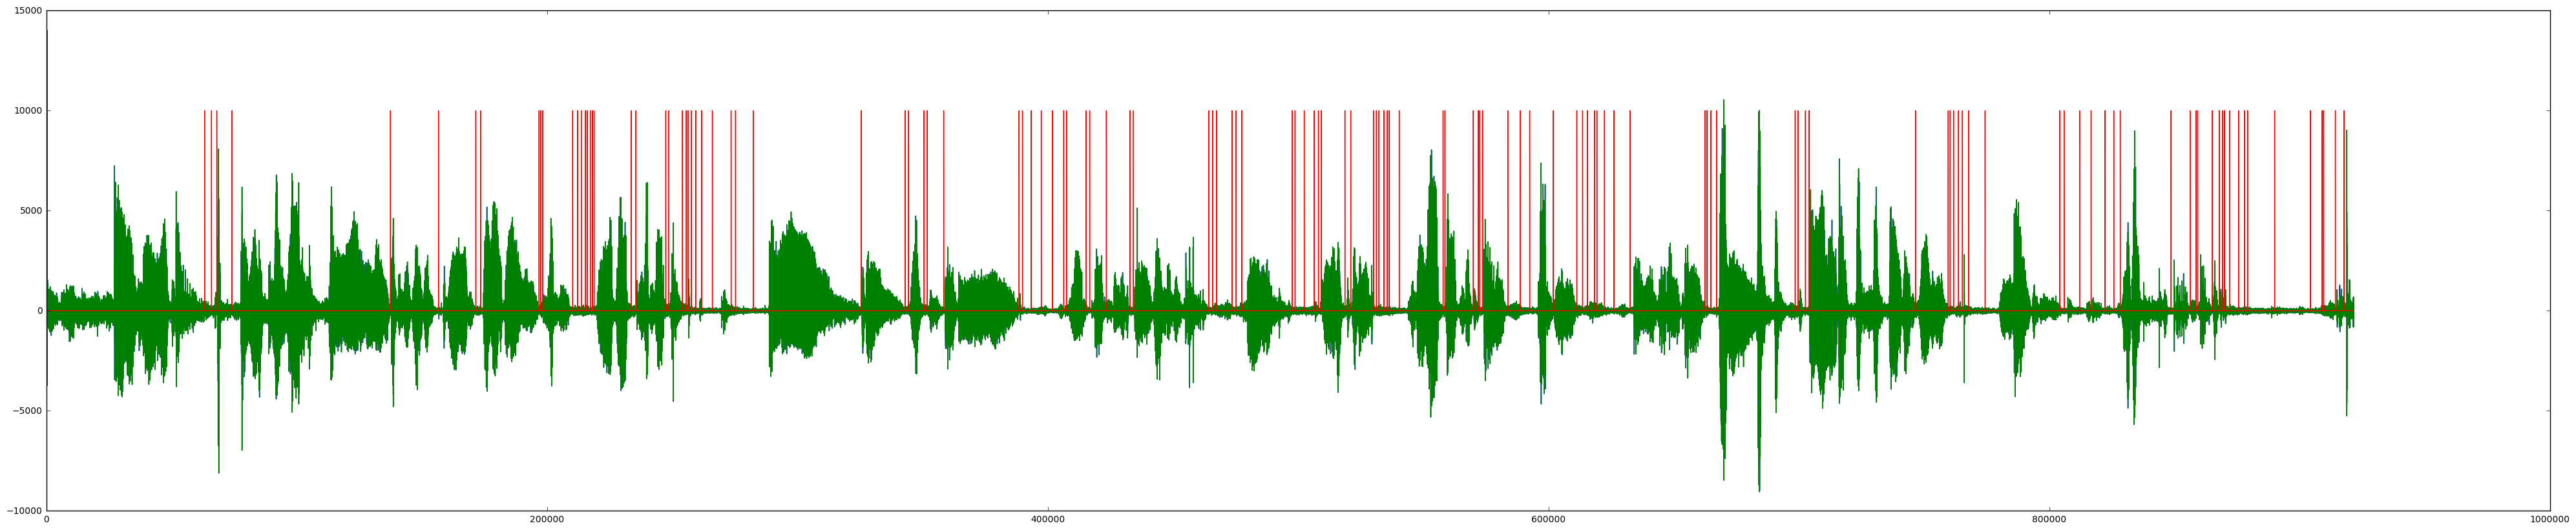

In [57]:
plt.figure(figsize=(50,10))
plt.plot(np.arange(data.shape[0]), data)
# plt.plot(np.arange(data.shape[0]), trigger)
plt.plot(np.arange(data.shape[0]), hardSplits)

# write split tracks to wav

In [58]:
out = "output"
try:
    os.stat(out)
except:
    os.mkdir(out)  

last = 0
for i,p in enumerate(splitPoints):
    wavfile.write(out+"/"+str(i)+".wav", rate, data[last:p])
    last = p